In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Этап загрузки данных**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Python/мдс/2lab1/train.csv')

**Этап анализа данных**

In [3]:
data.shape

(891, 12)

In [4]:
data = data.set_index('PassengerId')

In [5]:
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [9]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = data.mode(numeric_only=True).columns.values.tolist()
numerical_columns.remove('Survived')
print(categorical_columns)
print(numerical_columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [10]:
data[categorical_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
for c in categorical_columns:
  print(data[c].unique())

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

**Подготовка данных**

In [12]:
data.count(axis=0)

Survived    891
Pclass      891
Name        891
Sex         891
Age         891
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [13]:
data = data.fillna(data.median(axis=0), axis=0)

<ipython-input-13-4634965d352c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median(axis=0), axis=0)


In [14]:
data.count(axis=0)

Survived    891
Pclass      891
Name        891
Sex         891
Age         891
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [15]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
data['Embarked'] = data['Embarked'].fillna('S')

In [17]:
categorical_columns.remove('Cabin')

**Векторизация**

In [18]:
data_describe = data.describe(include=[object])
binary_columns = [c for c in categorical_columns if
data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if
data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Sex'] ['Name', 'Ticket', 'Embarked']


**Бинарные признаки**

In [19]:
data['Sex'] = data['Sex'].replace('male', 1)
data['Sex'] = data['Sex'].replace('female', 0)

**Небинарные признаки**

In [20]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
data_nonbinary = pd.get_dummies(data['Embarked'])
data_nonbinary

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [22]:
nonbinary_columns.remove('Name')

In [23]:
nonbinary_columns.remove('Ticket')

In [24]:
nonbinary_columns

['Embarked']

**Нормализация количественных признаков**

In [25]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-7.575933e-17,2.272780e-16,3.588600e-17,4.585433e-17,-1.196200e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.565228e+00,-2.251891e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01
25%,-3.691575e-01,-5.921480e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01
50%,8.269128e-01,0.000000e+00,-4.742788e-01,-4.734077e-01,-3.571902e-01
75%,8.269128e-01,4.076970e-01,4.325504e-01,-4.734077e-01,-2.423274e-02
max,8.269128e-01,3.868699e+00,6.780355e+00,6.970233e+00,9.661740e+00


In [26]:
survived = data['Survived']
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary),axis=1)
data = pd.DataFrame(data, dtype=float)
print(data.shape)
print(data.columns)

(891, 9)
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'C', 'Q', 'S'], dtype='object')


In [27]:
X_train = data
y_train = survived
feature_names = X_train.columns
print(feature_names)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'C', 'Q', 'S'], dtype='object')


In [28]:
print(X_train.shape)
print(y_train.shape)
N, d = X_train.shape

(891, 9)
(891,)


In [29]:
survived

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

**Обучающая и тестовая выборки**

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Python/мдс/2lab1/test_with_labels.csv')

In [31]:
df

,Unnamed: 0,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S
1,10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C
2,19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C
3,24,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S
4,25,1,0,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
411,1291,3,0,"Willer, Mr. Aaron (""Abi Weller"")",male,NaN,0,0,3410,8.7125,NaN,S
412,1296,3,0,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
413,1298,3,0,"Wittevrongel, Mr. Camille",male,36.0,0,0,345771,9.5000,NaN,S
414,1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C


In [32]:
def data_prep(data):
  data = data.set_index('Unnamed: 0')
  data['Age'] = data['Age'].fillna(data['Age'].mean())
  categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
  numerical_columns = data.mode(numeric_only=True).columns.values.tolist()
  data = data.fillna(data.median(axis=0), axis=0)
  data['Embarked'] = data['Embarked'].fillna('S')
  categorical_columns.remove('Cabin')
  data_describe = data.describe(include=[object])
  binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
  nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
  data['Sex'] = data['Sex'].replace('male', 1)
  data['Sex'] = data['Sex'].replace('female', 0)
  data_nonbinary = pd.get_dummies(data['Embarked'])
  nonbinary_columns.remove('Name')
  nonbinary_columns.remove('Ticket')
  data_numerical = data[numerical_columns]
  data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
  y = data['Survived'].values
  data = pd.concat((data_numerical, data[binary_columns], data_nonbinary),axis=1)
  data = pd.DataFrame(data, dtype=float)
  data = data.rename({'Sibsp': 'SibSp'}, axis=1)
  data = data.drop('Survived', axis=1)
  X = data

  return X, y

**Обучение модели**

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
y_train_pred=model.predict(X_train)

In [35]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.9820426487093153


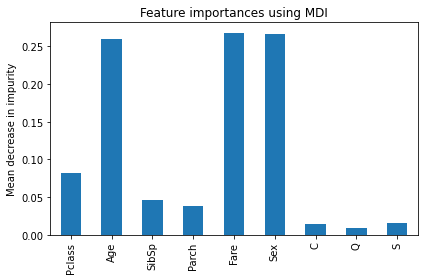

In [36]:
importances = model.feature_importances_

feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [37]:
X_test, y_test = data_prep(df)
y_test_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

<ipython-input-32-e332628ba027>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median(axis=0), axis=0)


Accuracy: 0.7644230769230769


In [38]:
#X_train = X_train.drop(columns = {'Sex', 'Age', 'Fare'}, axis=1)
X_train = X_train.drop(['Q'], axis=1)
feature_names = X_train.columns

Accuracy: 0.9820426487093153


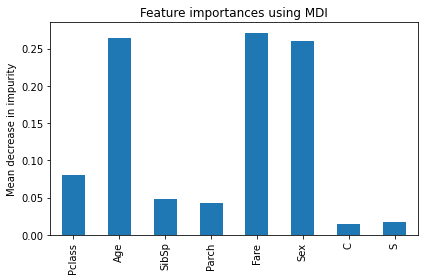

In [39]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)

y_train_pred=model2.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

importances = model2.feature_importances_

feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()